In [1]:
#Reference: https://www.kaggle.com/adiljadoon/word-cloud-with-python
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

In [3]:
df = pd.read_excel('D:/knowledge/college docs/DSP/Project2/FinalVideoListCommentPrevInfo_Food.xlsx')

In [5]:
#To find the relation between views and age of the video
from datetime import datetime
from dateutil.parser import parse

def convert_to_days(dt):
    d=parse(dt)
    a=d.strftime('%m/%d/%Y')
    x=datetime.strptime(a, '%m/%d/%Y').date()
    y=datetime.now().date()
    days=((y-x).days)
    return days

In [6]:
AgeVideo = []
for i in df['PublishedDate']:
    AgeVideo.append(convert_to_days(str(i)))
    
df['AgeVideo'] = AgeVideo

In [7]:
dfnew = df[df['AgeVideo']<700]

In [8]:
dfnew = dfnew[dfnew['AgeVideo']>30]

In [9]:
dfnew = dfnew[dfnew['ViewCount']<100000]

In [10]:
dfnew = dfnew[dfnew['ViewCount']>50000]

In [15]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(dfnew['Tags']))

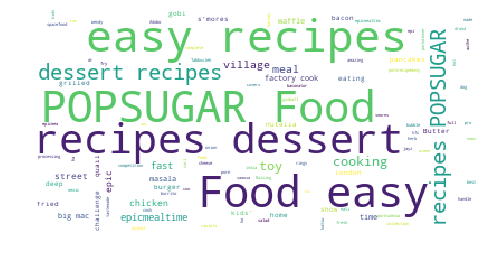

In [16]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [17]:
wordcloud1 = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(dfnew['Description']))

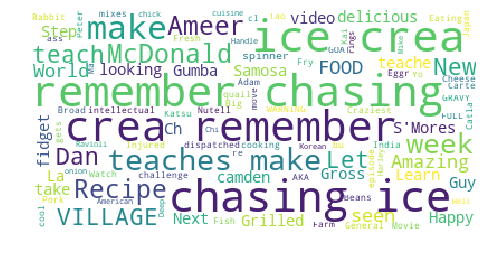

In [18]:
print(wordcloud1)
fig = plt.figure(1)
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()
fig.savefig("word11.png", dpi=900)